In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [40]:
df=pd.read_csv('/content/hypertension_data.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [43]:
#handling null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(df.iloc[:,[4,5,6,10,13]])
df.iloc[:,[4,5,6,10,13]]=imputer.transform(df.iloc[:,[4,5,6,10,13]])

In [44]:
df.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [45]:
#df= df.drop(["Unnamed: 0"], axis=1)

In [46]:
#df['Category'].loc[df['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
#df['Category'].loc[df['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0

In [47]:
#labelencoder = LabelEncoder()
#df['Category'] = labelencoder.fit_transform(df['Category'])
#df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [48]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df.shape

(26083, 14)

In [51]:
df['target'] = df['target'].astype('int64')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [54]:
df.nunique()

age          88
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [55]:
print("target 0: ",len(df.loc[df['target'] == 0]))
print("target 1: ",len(df.loc[df['target'] == 1]))

target 0:  11809
target 1:  14274


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

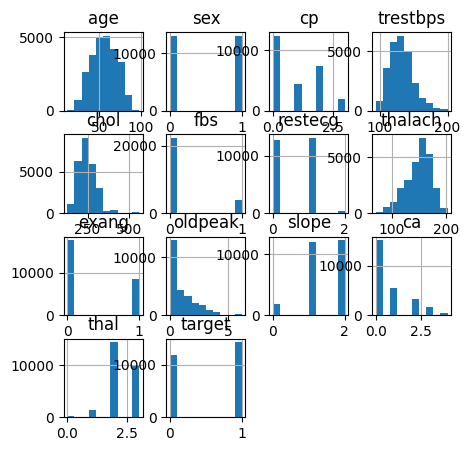

In [57]:
df.hist(figsize=[5,5])

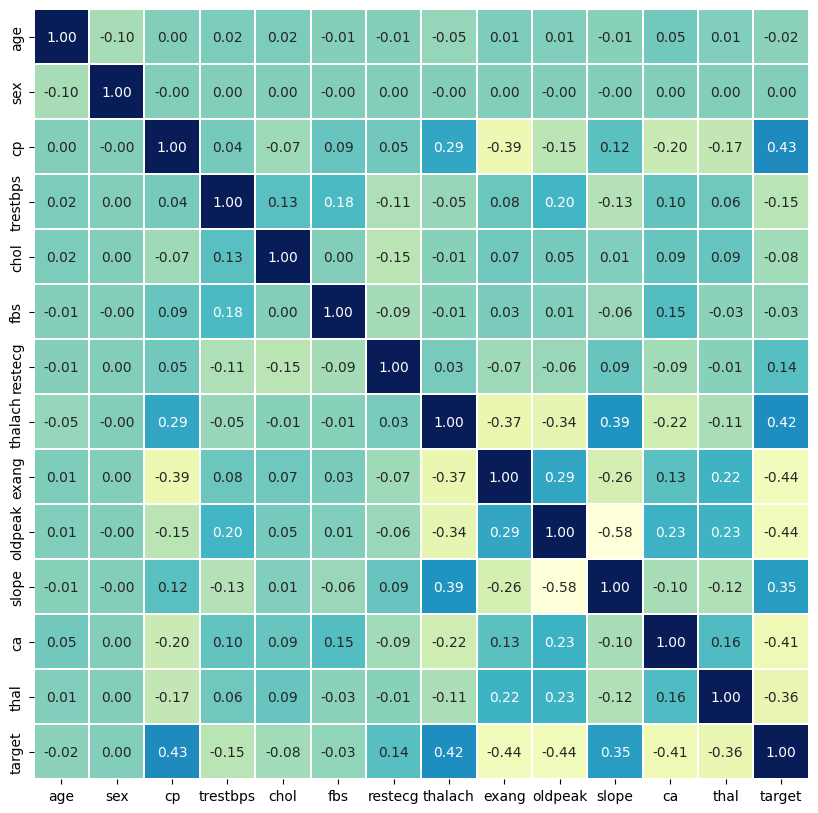

In [58]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', cmap="YlGnBu", cbar= False)
plt.show()

In [59]:
#df.drop(['ALB','CHE','CHOL'],inplace=True,axis=1)

In [60]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [62]:
X=df.drop(['target'],axis=1)
y=df['target']

In [63]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0.25,44.0,0.0,0.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,2.0
0.75,67.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0


In [64]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,23.0,1.0,2.0,20.0,64.0,0.0,1.0,33.0,1.0,1.6,1.0,1.0,1.0


In [65]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

In [66]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
lower limit,9.5,-1.5,-3.0,90.0,115.0,0.0,-1.5,83.5,-1.5,-2.4,-0.5,-1.5,0.5
upper limit,101.5,2.5,5.0,170.0,371.0,0.0,2.5,215.5,2.5,4.0,3.5,2.5,4.5


In [67]:
data = X[(X>lower_lim)&(X<upper_lim)]
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0
1,64.0,0.0,2,130.0,250.0,NaN,1,187.0,0,3.5,0,0.0,2.0
2,52.0,1.0,1,130.0,204.0,NaN,0,172.0,0,1.4,2,0.0,2.0
3,56.0,0.0,1,120.0,236.0,NaN,1,178.0,0,0.8,2,0.0,2.0
4,66.0,0.0,0,120.0,354.0,NaN,1,163.0,1,0.6,2,0.0,2.0


In [26]:
data.isnull().sum()

age             0
sex            25
cp              0
trestbps     1122
chol          424
fbs         26083
restecg         0
thalach        82
exang           0
oldpeak       694
slope           0
ca           2100
thal          154
dtype: int64

In [69]:
data_final=data.fillna(data.mean())
data_final.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.0,1.0
1,64.0,0.0,2,130.0,250.0,NaN,1,187.0,0,3.5,0,0.0,2.0
2,52.0,1.0,1,130.0,204.0,NaN,0,172.0,0,1.4,2,0.0,2.0
3,56.0,0.0,1,120.0,236.0,NaN,1,178.0,0,0.8,2,0.0,2.0
4,66.0,0.0,0,120.0,354.0,NaN,1,163.0,1,0.6,2,0.0,2.0


In [70]:
data_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,3,145.0,233.0,NaN,0,150.0,0,2.3,0,0.000000,1.0
1,64.0,0.0,2,130.0,250.0,NaN,1,187.0,0,3.5,0,0.000000,2.0
2,52.0,1.0,1,130.0,204.0,NaN,0,172.0,0,1.4,2,0.000000,2.0
3,56.0,0.0,1,120.0,236.0,NaN,1,178.0,0,0.8,2,0.000000,2.0
4,66.0,0.0,0,120.0,354.0,NaN,1,163.0,1,0.6,2,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138.0,294.0,NaN,1,106.0,0,1.9,1,0.507026,2.0
26079,60.0,1.0,0,144.0,200.0,NaN,0,126.0,1,0.9,1,0.000000,3.0
26080,68.0,1.0,0,100.0,234.0,NaN,1,156.0,0,0.1,2,1.000000,3.0
26081,67.0,1.0,1,154.0,232.0,NaN,0,164.0,0,0.0,2,1.000000,2.0


In [71]:
import pandas as pd
from sklearn import preprocessing

x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.528736,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.609195,0.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.471264,1.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.517241,0.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.632184,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [72]:
from sklearn.model_selection import train_test_split # splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, train_size=0.7,random_state=42)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [74]:
from sklearn.preprocessing import StandardScaler


In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Assuming you have a dataset with features (X) and labels (y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Split the training dataset into three equal parts for Client 1, Client 2, and Client 3
split_point1 = len(X_train_scaled) // 3
split_point2 = 2 * len(X_train_scaled) // 3

client1_data = X_train_scaled[:split_point1]
client1_labels = y_train[:split_point1]

client2_data = X_train_scaled[split_point1:split_point2]
client2_labels = y_train[split_point1:split_point2]

client3_data = X_train_scaled[split_point2:]
client3_labels = y_train[split_point2:]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
client1_data_imputed = imputer.fit_transform(client1_data)
client2_data_imputed = imputer.transform(client2_data)
client3_data_imputed = imputer.transform(client3_data)

# Hyperparameter Tuning
client1_model = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=42).fit(client1_data_imputed, client1_labels)
client2_model = ExtraTreesClassifier(n_estimators=25, max_depth=8, random_state=42).fit(client2_data_imputed, client2_labels)

# Advanced Data Augmentation (SMOTE) for Client 3
smote = SMOTE(sampling_strategy='auto', random_state=42)
client3_data_resampled, client3_labels_resampled = smote.fit_resample(client3_data_imputed, client3_labels)
client3_model = KNeighborsClassifier(n_neighbors=5).fit(client3_data_resampled, client3_labels_resampled)

# Apply imputation to the test data
X_test_scaled = scaler.transform(X_test)
test_data_imputed = imputer.transform(X_test_scaled)

# Make predictions with each local model using imputed test data
client1_predictions = client1_model.predict(test_data_imputed)
client2_predictions = client2_model.predict(test_data_imputed)
client3_predictions = client3_model.predict(test_data_imputed)

# Aggregate predictions at the global model
global_predictions = mode([client1_predictions, client2_predictions, client3_predictions], axis=0)[0]

# Evaluate each local model individually
client1_accuracy = accuracy_score(test_labels, client1_predictions)
client2_accuracy = accuracy_score(test_labels, client2_predictions)
client3_accuracy = accuracy_score(test_labels, client3_predictions)

# Evaluate the global model
global_accuracy = accuracy_score(test_labels, global_predictions)

print("Client 1 Model Accuracy: ", client1_accuracy)
print("Client 2 Model Accuracy: ", client2_accuracy)
print("Client 3 Model Accuracy: ", client3_accuracy)
print("Federated Model (Global) Accuracy: ", global_accuracy)


Client 1 Model Accuracy:  0.9952079739313782
Client 2 Model Accuracy:  0.9610887483227909
Client 3 Model Accuracy:  0.9963580601878474
Federated Model (Global) Accuracy:  0.9946329308031435


In [76]:
#extra is the global model


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each local model
client1_precision = precision_score(test_labels, client1_predictions)
client1_recall = recall_score(test_labels, client1_predictions)
client1_f1 = f1_score(test_labels, client1_predictions)

client2_precision = precision_score(test_labels, client2_predictions)
client2_recall = recall_score(test_labels, client2_predictions)
client2_f1 = f1_score(test_labels, client2_predictions)

client3_precision = precision_score(test_labels, client3_predictions)
client3_recall = recall_score(test_labels, client3_predictions)
client3_f1 = f1_score(test_labels, client3_predictions)

# Calculate precision, recall, and F1-score for the global model
global_precision = precision_score(test_labels, global_predictions)
global_recall = recall_score(test_labels, global_predictions)
global_f1 = f1_score(test_labels, global_predictions)

# Print the results
print("Client 1 Model Accuracy: ", client1_accuracy)
print("Client 1 Model Precision: ", client1_precision)
print("Client 1 Model Recall: ", client1_recall)
print("Client 1 Model F1-score: ", client1_f1)

print("Client 2 Model Accuracy: ", client2_accuracy)
print("Client 2 Model Precision: ", client2_precision)
print("Client 2 Model Recall: ", client2_recall)
print("Client 2 Model F1-score: ", client2_f1)

print("Client 3 Model Accuracy: ", client3_accuracy)
print("Client 3 Model Precision: ", client3_precision)
print("Client 3 Model Recall: ", client3_recall)
print("Client 3 Model F1-score: ", client3_f1)

print("Federated Model (Global) Accuracy: ", global_accuracy)
print("Federated Model (Global) Precision: ", global_precision)
print("Federated Model (Global) Recall: ", global_recall)
print("Federated Model (Global) F1-score: ", global_f1)


Client 1 Model Accuracy:  0.9952079739313782
Client 1 Model Precision:  0.9913941480206541
Client 1 Model Recall:  1.0
Client 1 Model F1-score:  0.9956784788245463
Client 2 Model Accuracy:  0.9610887483227909
Client 2 Model Precision:  0.9413122321134191
Client 2 Model Recall:  0.9913194444444444
Client 2 Model F1-score:  0.9656688652122442
Client 3 Model Accuracy:  0.9963580601878474
Client 3 Model Precision:  0.9986057859881492
Client 3 Model Recall:  0.9947916666666666
Client 3 Model F1-score:  0.996695077404766
Federated Model (Global) Accuracy:  0.9946329308031435
Federated Model (Global) Precision:  0.9907088781830695
Federated Model (Global) Recall:  0.9996527777777777
Federated Model (Global) F1-score:  0.9951607328033183


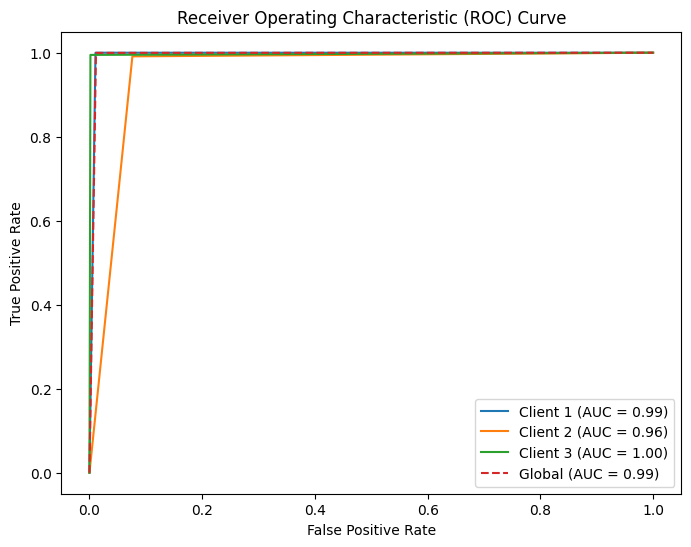

In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataset with features (X) and labels (y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Split the training dataset into three equal parts for Client 1, Client 2, and Client 3
split_point1 = len(X_train_scaled) // 3
split_point2 = 2 * len(X_train_scaled) // 3

client1_data = X_train_scaled[:split_point1]
client1_labels = y_train[:split_point1]

client2_data = X_train_scaled[split_point1:split_point2]
client2_labels = y_train[split_point1:split_point2]

client3_data = X_train_scaled[split_point2:]
client3_labels = y_train[split_point2:]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
client1_data_imputed = imputer.fit_transform(client1_data)
client2_data_imputed = imputer.transform(client2_data)
client3_data_imputed = imputer.transform(client3_data)

# Hyperparameter Tuning
client1_model = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=42).fit(client1_data_imputed, client1_labels)
client2_model = ExtraTreesClassifier(n_estimators=25, max_depth=8, random_state=42).fit(client2_data_imputed, client2_labels)

# Advanced Data Augmentation (SMOTE) for Client 3
smote = SMOTE(sampling_strategy='auto', random_state=42)
client3_data_resampled, client3_labels_resampled = smote.fit_resample(client3_data_imputed, client3_labels)
client3_model = KNeighborsClassifier(n_neighbors=5).fit(client3_data_resampled, client3_labels_resampled)

# Apply imputation to the test data
X_test_scaled = scaler.transform(X_test)
test_data_imputed = imputer.transform(X_test_scaled)

# Make predictions with each local model using imputed test data
client1_predictions = client1_model.predict(test_data_imputed)
client2_predictions = client2_model.predict(test_data_imputed)
client3_predictions = client3_model.predict(test_data_imputed)

# Aggregate predictions at the global model
global_predictions = mode([client1_predictions, client2_predictions, client3_predictions], axis=0)[0]

# Evaluate each local model individually
client1_accuracy = accuracy_score(test_labels, client1_predictions)
client2_accuracy = accuracy_score(test_labels, client2_predictions)
client3_accuracy = accuracy_score(test_labels, client3_predictions)

# Evaluate the global model
global_accuracy = accuracy_score(test_labels, global_predictions)



# ROC Curve for each local model
client1_fpr, client1_tpr, _ = roc_curve(test_labels, client1_predictions)
client2_fpr, client2_tpr, _ = roc_curve(test_labels, client2_predictions)
client3_fpr, client3_tpr, _ = roc_curve(test_labels, client3_predictions)
global_fpr, global_tpr, _ = roc_curve(test_labels, global_predictions)

# AUC for each local model
client1_auc = auc(client1_fpr, client1_tpr)
client2_auc = auc(client2_fpr, client2_tpr)
client3_auc = auc(client3_fpr, client3_tpr)
global_auc = auc(global_fpr, global_tpr)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(client1_fpr, client1_tpr, label=f'Client 1 (AUC = {client1_auc:.2f})')
plt.plot(client2_fpr, client2_tpr, label=f'Client 2 (AUC = {client2_auc:.2f})')
plt.plot(client3_fpr, client3_tpr, label=f'Client 3 (AUC = {client3_auc:.2f})')
plt.plot(global_fpr, global_tpr, label=f'Global (AUC = {global_auc:.2f})', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


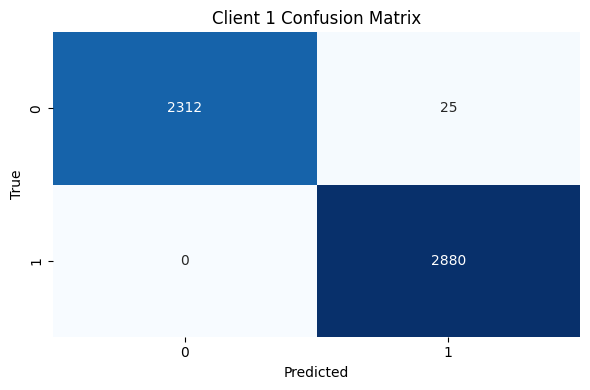

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for Client 1
client1_conf_matrix = confusion_matrix(test_labels, client1_predictions)

# Plot Confusion Matrix for Client 1
plt.figure(figsize=(6, 4))
sns.heatmap(client1_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Client 1 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


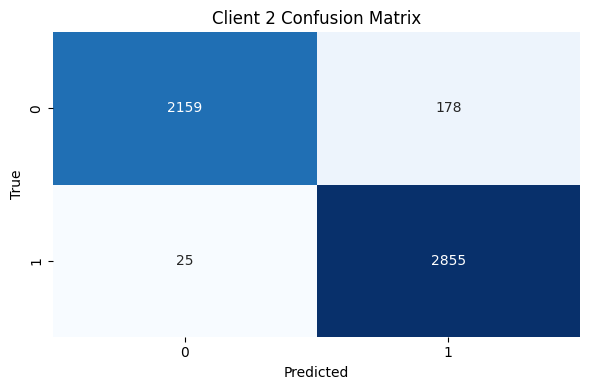

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for Client 2
client2_conf_matrix = confusion_matrix(test_labels, client2_predictions)

# Plot Confusion Matrix for Client 2
plt.figure(figsize=(6, 4))
sns.heatmap(client2_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Client 2 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


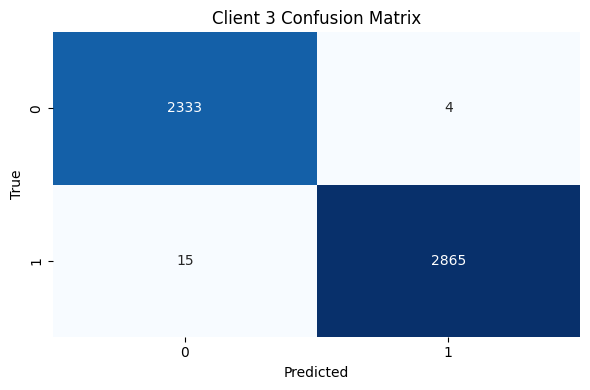

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for Client 3
client3_conf_matrix = confusion_matrix(test_labels, client3_predictions)

# Plot Confusion Matrix for Client 3
plt.figure(figsize=(6, 4))
sns.heatmap(client3_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Client 3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


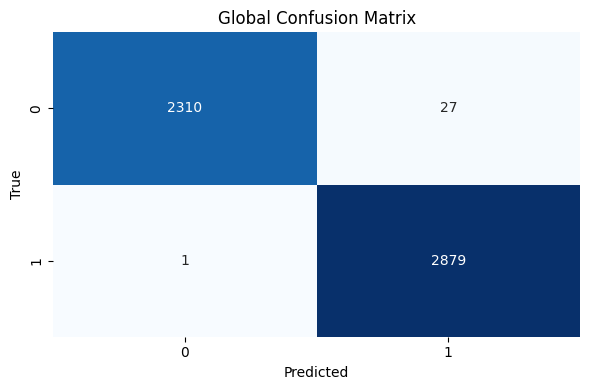

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for the global model
global_conf_matrix = confusion_matrix(test_labels, global_predictions)

# Plot Confusion Matrix for Global Model
plt.figure(figsize=(6, 4))
sns.heatmap(global_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Global Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


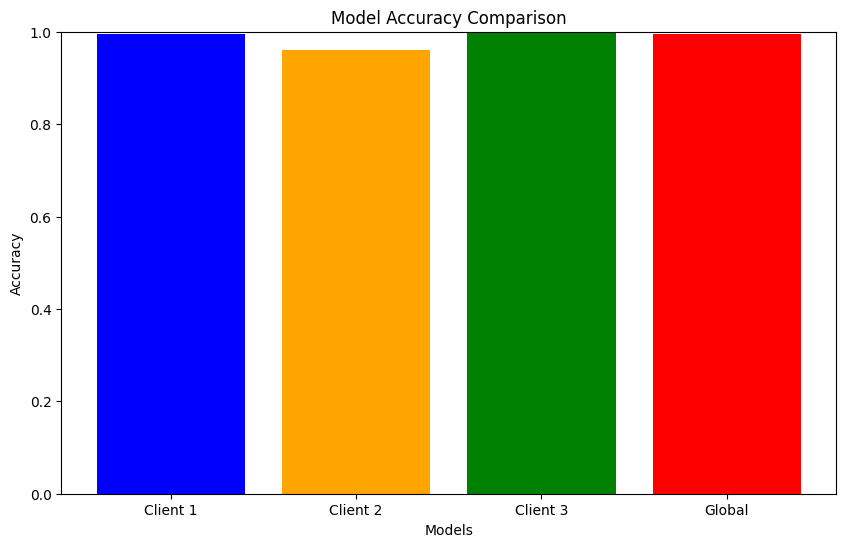

In [86]:
import matplotlib.pyplot as plt

# Data for plotting
clients = ['Client 1', 'Client 2', 'Client 3', 'Global']
accuracies = [client1_accuracy, client2_accuracy, client3_accuracy, global_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(clients, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limiting y-axis to range from 0 to 1
plt.show()


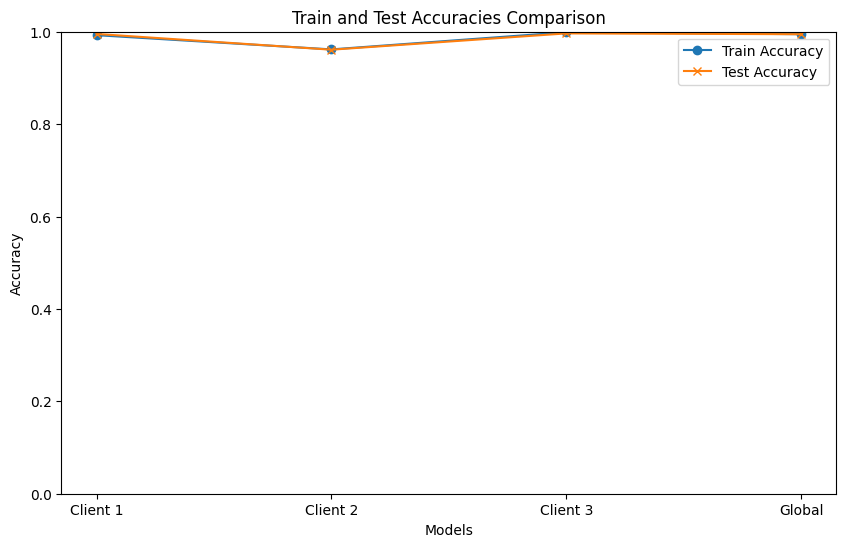

In [87]:
# Lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Hyperparameter Tuning
client1_model = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=42)
client1_model.fit(client1_data_imputed, client1_labels)
client2_model = ExtraTreesClassifier(n_estimators=25, max_depth=8, random_state=42)
client2_model.fit(client2_data_imputed, client2_labels)

# Train accuracy
client1_train_accuracy = accuracy_score(client1_labels, client1_model.predict(client1_data_imputed))
client2_train_accuracy = accuracy_score(client2_labels, client2_model.predict(client2_data_imputed))

train_accuracies.append(client1_train_accuracy)
train_accuracies.append(client2_train_accuracy)

# Test accuracy
client1_test_accuracy = accuracy_score(test_labels, client1_model.predict(test_data_imputed))
client2_test_accuracy = accuracy_score(test_labels, client2_model.predict(test_data_imputed))

test_accuracies.append(client1_test_accuracy)
test_accuracies.append(client2_test_accuracy)

# Advanced Data Augmentation (SMOTE) for Client 3
smote = SMOTE(sampling_strategy='auto', random_state=42)
client3_data_resampled, client3_labels_resampled = smote.fit_resample(client3_data_imputed, client3_labels)
client3_model = KNeighborsClassifier(n_neighbors=5)
client3_model.fit(client3_data_resampled, client3_labels_resampled)

# Train accuracy for client 3
client3_train_accuracy = accuracy_score(client3_labels_resampled, client3_model.predict(client3_data_resampled))
train_accuracies.append(client3_train_accuracy)

# Test accuracy for client 3
client3_test_accuracy = accuracy_score(test_labels, client3_model.predict(test_data_imputed))
test_accuracies.append(client3_test_accuracy)

# Aggregate predictions at the global model
global_predictions = mode([client1_predictions, client2_predictions, client3_predictions], axis=0)[0]

# Train accuracy for the global model
global_train_accuracy = accuracy_score(test_labels, global_predictions)
train_accuracies.append(global_train_accuracy)

# Evaluate the global model
global_accuracy = accuracy_score(test_labels, global_predictions)
test_accuracies.append(global_accuracy)

# Plotting train and test accuracies
models = ['Client 1', 'Client 2', 'Client 3', 'Global']
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(models, test_accuracies, marker='x', label='Test Accuracy')
plt.title('Train and Test Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()


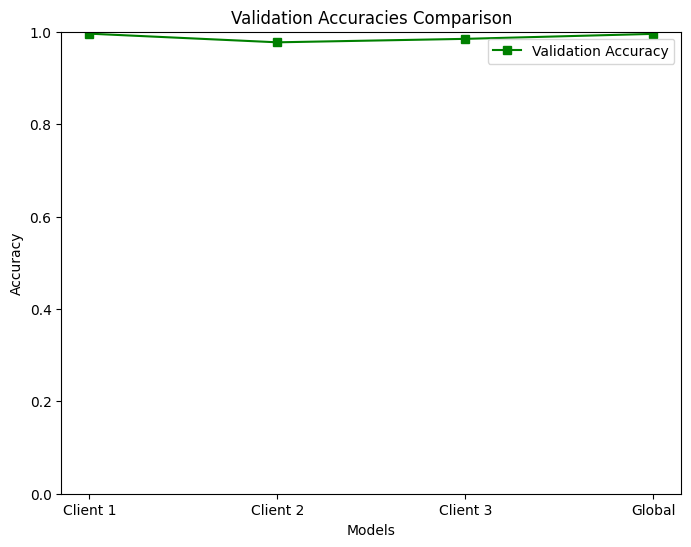

Client 1 Validation Accuracy: 0.9958
Client 2 Validation Accuracy: 0.9771
Client 3 Validation Accuracy: 0.9846
Global Validation Accuracy: 0.9953


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from scipy.stats import mode
import matplotlib.pyplot as plt

# Lists to store validation accuracies and model names
validation_accuracies = []
models = ['Client 1', 'Client 2', 'Client 3', 'Global']

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit polynomial transformation on the training data
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

# Train and evaluate models on training and validation sets
client1_model = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=42)
client1_model.fit(X_train_poly_scaled, y_train)

client2_model = ExtraTreesClassifier(n_estimators=25, max_depth=8, random_state=42)
client2_model.fit(X_train_poly_scaled, y_train)

# Validate the models
client1_val_accuracy = accuracy_score(y_val, client1_model.predict(X_val_poly_scaled))
client2_val_accuracy = accuracy_score(y_val, client2_model.predict(X_val_poly_scaled))

# Store validation accuracies
validation_accuracies.append(client1_val_accuracy)
validation_accuracies.append(client2_val_accuracy)

# Advanced Data Augmentation (SMOTE) for Client 3
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
client3_model = KNeighborsClassifier(n_neighbors=5)
client3_model.fit(X_train_resampled, y_train_resampled)

# Validate the model
client3_val_accuracy = accuracy_score(y_val, client3_model.predict(X_val))
validation_accuracies.append(client3_val_accuracy)

# Aggregate predictions at the global model
global_predictions = mode([client1_model.predict(X_val_poly_scaled),
                           client2_model.predict(X_val_poly_scaled),
                           client3_model.predict(X_val)], axis=0)[0]

# Validate the global model
global_val_accuracy = accuracy_score(y_val, global_predictions)
validation_accuracies.append(global_val_accuracy)

# Plotting validation accuracies
plt.figure(figsize=(8, 6))
plt.plot(models, validation_accuracies, marker='s', label='Validation Accuracy', color='green')
plt.title('Validation Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()

# Print validation accuracies
for model, accuracy in zip(models, validation_accuracies):
    print(f'{model} Validation Accuracy: {accuracy:.4f}')
